In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-dataset/covid_data.csv


In [2]:
df  = pd.read_csv("/kaggle/input/covid-dataset/covid_data.csv")

In [3]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check data types
print("\nData types in the dataset:")
print(df.dtypes)

# Step 2: Data Summary
# Summary statistics for numerical columns
summary_stats = df.describe()

# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])

# Display summary statistics
print("\nSummary Statistics for Numerical Columns:")
print(summary_stats)

print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Missing values in the dataset:
location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

Data types in the dataset:
location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

Summary Statistics for Numerical Columns:
           new_cases    new_deaths    population  aged_65_older_percent  \
count   23082.000000  23082.000000  2.301800e+04           20643.000000   
mean      624.769257     35.629062  1.037003e+08               9.758570   
std      5517.309068    330.986941  6.716897e+08             

In [4]:
# Fill missing values in 'population', 'aged_65_older_percent', 'gdp_per_capita', and 'hospital_beds_per_thousand'
df['population'].fillna(df['population'].mean(), inplace=True)
df['aged_65_older_percent'].fillna(df['aged_65_older_percent'].mean(), inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].mean(), inplace=True)
df['hospital_beds_per_thousand'].fillna(df['hospital_beds_per_thousand'].mean(), inplace=True)

# Check if missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64



Duplicate rows: False


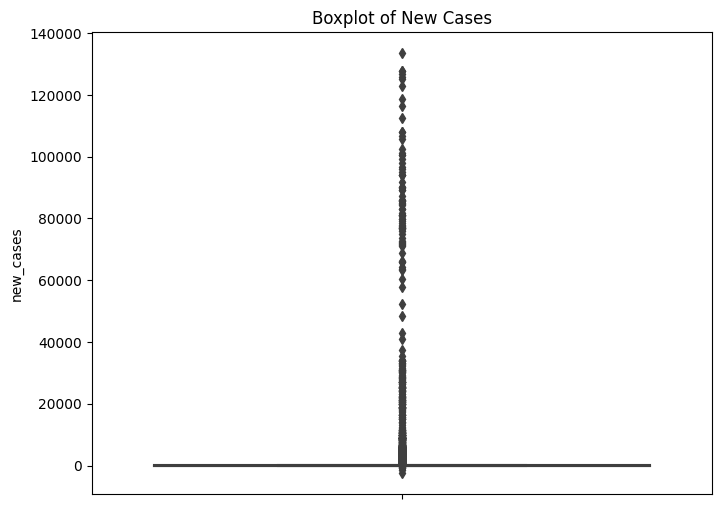


Unrealistic cases:
             location        date  new_cases  new_deaths    population  \
2446            Benin  2020-05-20       -209           0  1.212320e+07   
6237          Ecuador  2020-05-07      -2461          49  1.764306e+07   
6239          Ecuador  2020-05-09      -1480          50  1.764306e+07   
6242          Ecuador  2020-05-12        -50          18  1.764306e+07   
7488           France  2020-06-03       -766         107  6.527351e+07   
12538       Lithuania  2020-04-29       -105           3  2.722291e+06   
16899        Portugal  2020-05-03       -161          16  1.019671e+07   
17959      San Marino  2020-05-11         -9           0  3.393800e+04   
19498           Spain  2020-04-19       -713         410  4.675478e+07   
19534           Spain  2020-05-25       -372       -1918  4.675478e+07   
21396          Uganda  2020-05-21       -115           0  4.574100e+07   
21408          Uganda  2020-06-02         -1           0  4.574100e+07   
21805  United King

In [5]:
duplicates = df.duplicated()
print("\nDuplicate rows:", duplicates.any())

# Check for outliers (you may need to define specific outlier detection criteria)
# Example: Visualize 'new_cases' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='new_cases')
plt.title('Boxplot of New Cases')
plt.show()

# Check for unrealistic values (e.g., negative cases, deaths, or population)
unrealistic_cases = df[df['new_cases'] < 0]
unrealistic_deaths = df[df['new_deaths'] < 0]
unrealistic_population = df[df['population'] < 0]

print("\nUnrealistic cases:")
print(unrealistic_cases)

print("\nUnrealistic deaths:")
print(unrealistic_deaths)

print("\nUnrealistic population:")
print(unrealistic_population)


In [6]:
# Replace negative values with their positive counterparts
df['new_cases'] = df['new_cases'].apply(lambda x: abs(x))
df['new_deaths'] = df['new_deaths'].apply(lambda x: abs(x))

# Verify that negative values have been replaced
print("Negative values replaced:")
print("Negative values in 'new_cases':", (df['new_cases'] < 0).any())
print("Negative values in 'new_deaths':", (df['new_deaths'] < 0).any())


Negative values replaced:
Negative values in 'new_cases': False
Negative values in 'new_deaths': False


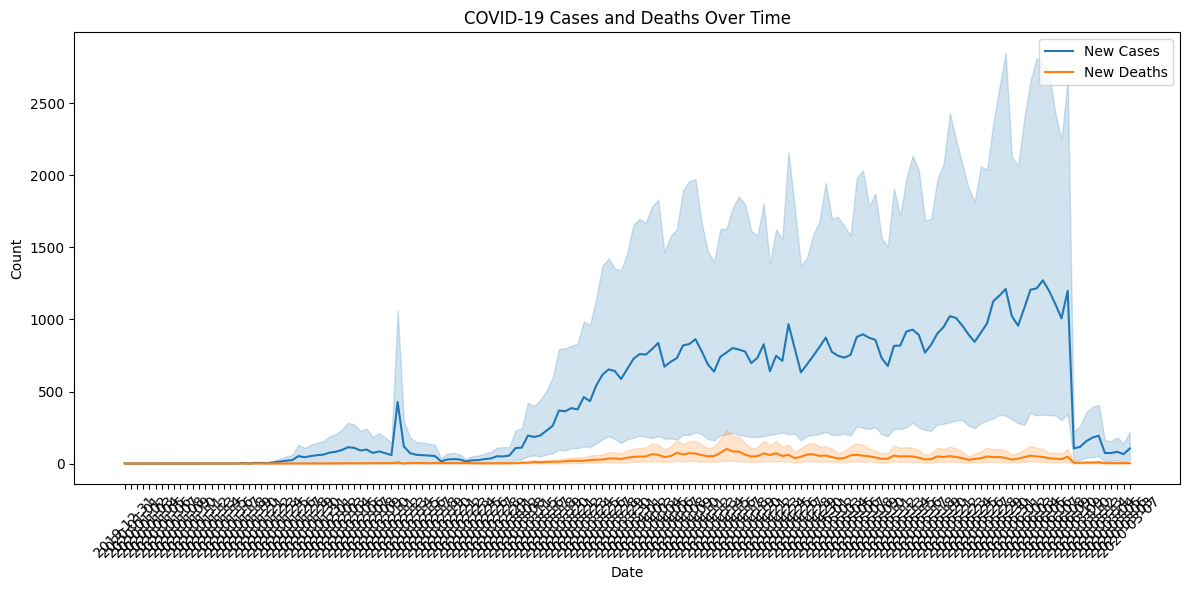


Top Countries by Total Cases:
location
World             7210462
United States     1979850
Brazil             739503
Russia             485253
United Kingdom     290190
India              276583
Spain              244136
Italy              235561
Peru               203736
Germany            184861
Name: new_cases, dtype: int64

Top Countries by Total Deaths:
location
World             411195
United States     112006
United Kingdom     40883
Brazil             38406
Italy              34043
Spain              30972
France             29296
Mexico             14649
Belgium             9619
Germany             8729
Name: new_deaths, dtype: int64


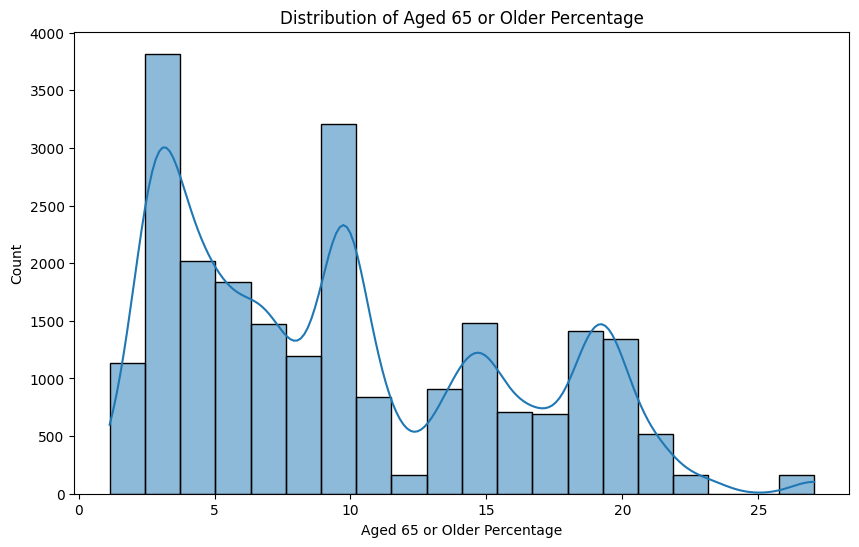

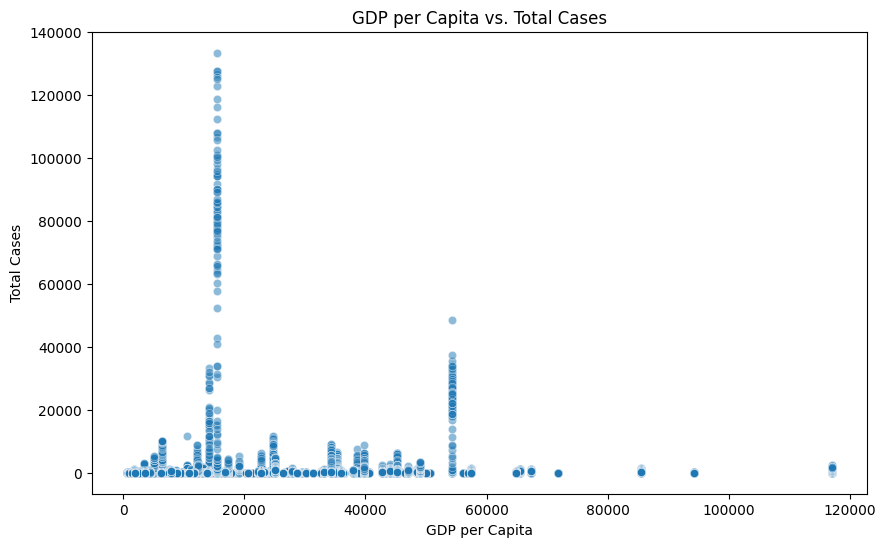

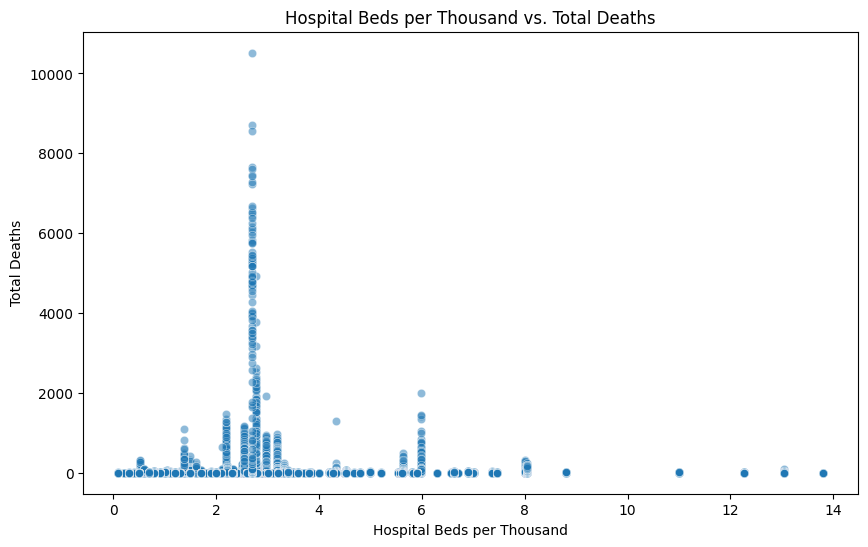

In [7]:

# 3. Total Cases and Deaths Over Time
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='date', y='new_cases', data=df, label='New Cases')
sns.lineplot(x='date', y='new_deaths', data=df, label='New Deaths', ax=ax)
plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()  # Ensure the plot layout is not cropped
plt.show()

# 4. Top Countries by Total Cases and Deaths
top_countries_cases = df.groupby('location')['new_cases'].sum().nlargest(10)
top_countries_deaths = df.groupby('location')['new_deaths'].sum().nlargest(10)

print("\nTop Countries by Total Cases:")
print(top_countries_cases)

print("\nTop Countries by Total Deaths:")
print(top_countries_deaths)

# 5. Age Distribution of Cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='aged_65_older_percent', bins=20, kde=True)
plt.title('Distribution of Aged 65 or Older Percentage')
plt.xlabel('Aged 65 or Older Percentage')
plt.ylabel('Count')
plt.show()

# 6. GDP vs. Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp_per_capita', y='new_cases', alpha=0.5)
plt.title('GDP per Capita vs. Total Cases')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.show()

# 7. Hospital Beds vs. Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hospital_beds_per_thousand', y='new_deaths', alpha=0.5)
plt.title('Hospital Beds per Thousand vs. Total Deaths')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Total Deaths')
plt.show()

In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
file_path = "/kaggle/input/covid-dataset/covid_data.csv"
df = pd.read_csv(file_path)

# Handling Negative Values (if not done already)
df['new_cases'] = df['new_cases'].apply(lambda x: abs(x))
df['new_deaths'] = df['new_deaths'].apply(lambda x: abs(x))

# Location-Wise Analysis

# Create a choropleth map of total cases by location
fig = px.choropleth(
    df,
    locations="location",
    locationmode="country names",
    color="new_cases",
    hover_name="location",
    animation_frame="date",
    title="COVID-19 Total Cases by Location",
    color_continuous_scale=px.colors.sequential.Plasma,
)
fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.show()

# Date-Wise Analysis

# Create a line chart to visualize new cases and new deaths over time
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df['date'],
        y=df['new_cases'],
        mode='lines',
        name='New Cases',
    )
)

fig.add_trace(
    go.Scatter(
        x=df['date'],
        y=df['new_deaths'],
        mode='lines',
        name='New Deaths',
    )
)

fig.update_layout(
    title="COVID-19 New Cases and New Deaths Over Time",
    xaxis_title="Date",
    yaxis_title="Count",
)
fig.show()


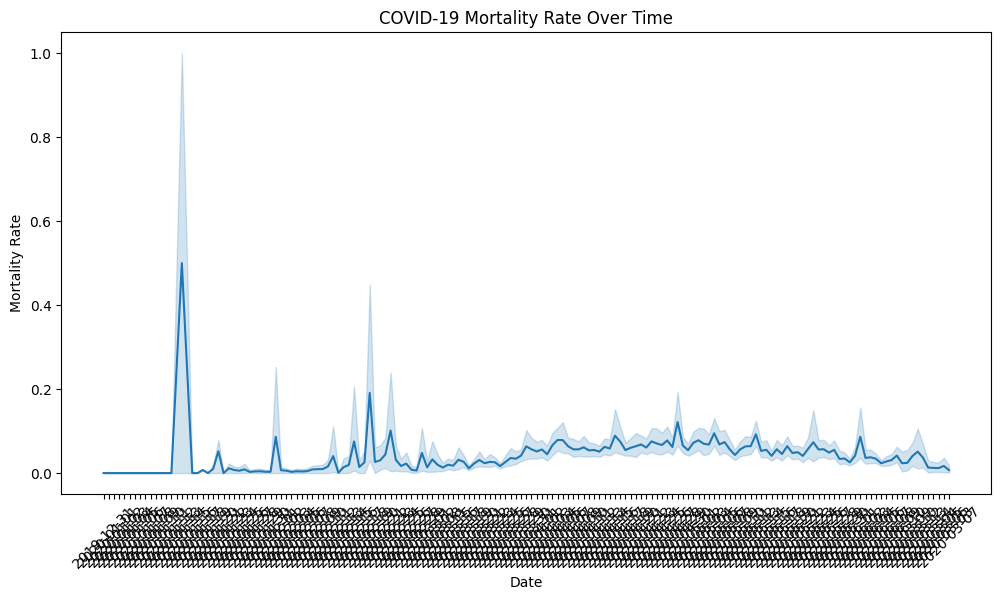

In [9]:
# Calculate and plot the mortality rate
df['mortality_rate'] = df['new_deaths'] / df['new_cases']
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='mortality_rate', data=df)
plt.title('COVID-19 Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_20/3013745389.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




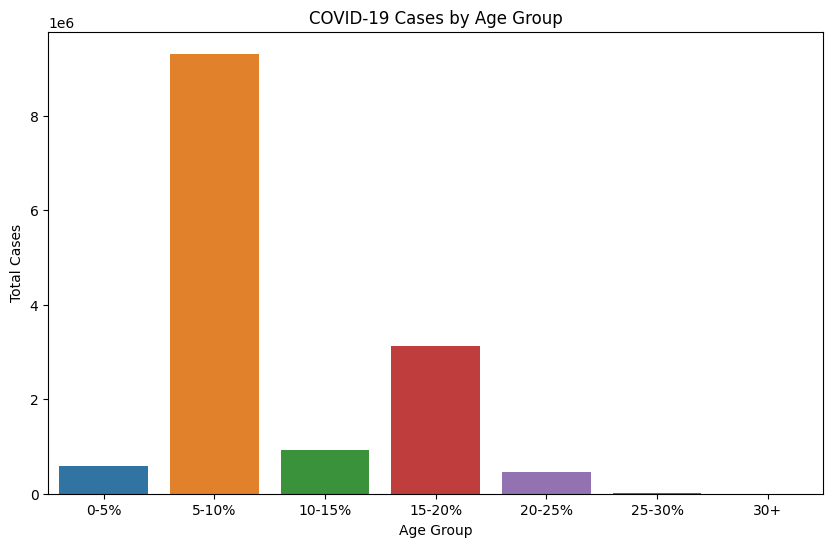

In [10]:
# Create age group categories and analyze cases by age group
df['age_group'] = pd.cut(df['aged_65_older_percent'], bins=[0, 5, 10, 15, 20, 25, 30, 100],
                         labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30+'])

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='new_cases', data=df, estimator=sum, ci=None)
plt.title('COVID-19 Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
plt.show()
